In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import wasserstein_distance
from scipy.stats import energy_distance
from scipy.stats import ks_2samp

### Set Model-to-Evaluate

In [2]:
model = "review-representative-m500"

### Load Data

In [3]:
with open("../evaluated/{}.json".format(model),"r") as fp:
    data = json.load(fp)

## Visualizations

### Risks

/home/ubuntu/generative-adversarial-networks/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


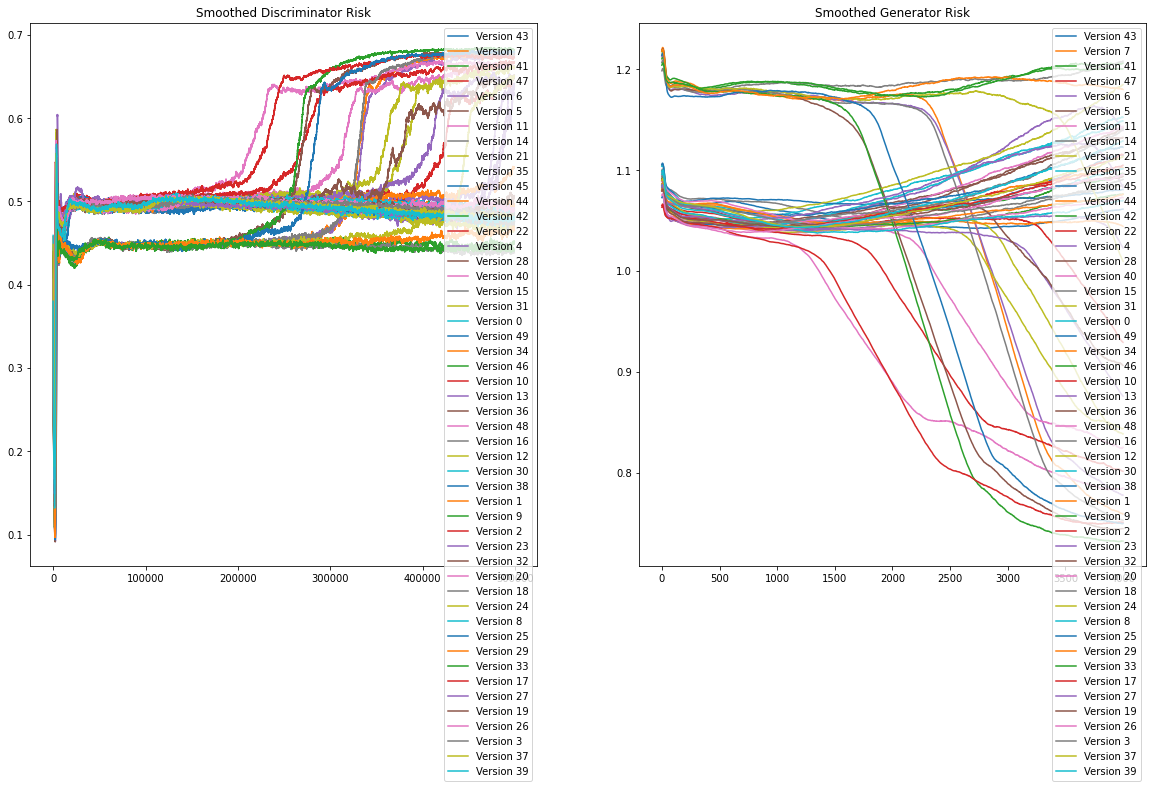

In [4]:
n_ma = 1000
plt.figure(figsize=(20,10))#
# Discriminator
plt.subplot(1,2,1)
plt.title("Smoothed Discriminator Risk")
for variant in list(data):
    plt.plot(np.convolve(data[variant]["Risk"]["R_d"], np.ones(n_ma)/n_ma, mode='valid'), label="Version {}".format(variant))
plt.legend()
# Generator
plt.subplot(1,2,2)
plt.title("Smoothed Generator Risk")
for variant in list(data):
    plt.plot(np.convolve(data[variant]["Risk"]["R_g"], np.ones(n_ma)/n_ma, mode='valid'), label="Version {}".format(variant))
plt.legend()
# Display
plt.show()

### Classification Metrics

In [5]:
def plot_metrics(data, n_ma = 1000):
    plt.cla();plt.clf()
    plt.figure(figsize=(20,20))
    # Acc
    plt.subplot(2,2,1)
    plt.title("Accuracy [ (tp+tn)/n ] des Diskriminators")
    for variant in list(data):
        plt.plot(np.convolve(data[variant]["Classification"]["acc_chart"], np.ones(n_ma)/n_ma, mode='valid'), label="Version {}".format(variant))
    plt.legend()
    # Prc
    plt.subplot(2,2,2)
    plt.title("Precision [ tp/(tp+fp) ] des Diskriminators")
    for variant in list(data):
        plt.plot(np.convolve(data[variant]["Classification"]["prc_chart"], np.ones(n_ma)/n_ma, mode='valid'), label="Version {}".format(variant))
    plt.legend()
    # Rec
    plt.subplot(2,2,3)
    plt.title("Recall [ tp/(tp+fn) ] des Diskriminators")
    for variant in list(data):
        plt.plot(np.convolve(data[variant]["Classification"]["rec_chart"], np.ones(n_ma)/n_ma, mode='valid'), label="Version {}".format(variant))
    plt.legend()
    # Acc
    plt.subplot(2,2,4)
    plt.title("Specificity [ tn/(tn+fp) ] des Diskriminators")
    for variant in list(data):
        plt.plot(np.convolve(data[variant]["Classification"]["spc_chart"], np.ones(n_ma)/n_ma, mode='valid'), label="Version {}".format(variant))
    plt.legend()
    # Display
    plt.show()

In [ ]:
plot_metrics(data)

### Distributions

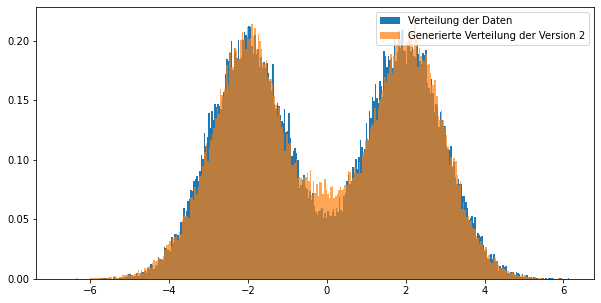

In [12]:
N = len(data[list(data)[0]]["Samples"]["data"])
plt.figure(figsize=(10,5))
plt.hist(
    np.ravel(np.array(data[list(data)[0]]["Samples"]["data"])),
    bins=int(np.sqrt(N)), 
    label="Verteilung der Daten", 
    density=True
)
for variant in list(data)[1:2]:
    plt.hist(
        np.ravel(np.array(data[variant]["Samples"]["generator"])),
        bins=int(np.sqrt(N)),
        label="Generierte Verteilung der Version {}".format(variant),
        alpha=0.7,
        density=True
    )
plt.legend()
plt.show()

### CDF

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data[list(data)[0]]["CDF"]["data"], label="Empirische Verteilungsfunktion der Daten")
for variant in list(data):
    plt.plot(
        data[variant]["CDF"]["generated"],
        label="Empirische Verteilungsfunktion der generierten Daten der Version {}".format(variant)
    )
plt.legend()
plt.show()

## Calculations

### sup |P(X)-P(U)|

In [4]:
sups = []
for variant in list(data):
    diffs = np.array(data[variant]["CDF"]["data"]) - np.array(data[variant]["CDF"]["generated"])
    abs_diff = np.abs(diffs)
    sups.append(np.max(abs_diff))
    print("Version {}: sup |P(X)-P(U)| = {:.3%}".format(variant, np.max(abs_diff)))

Version 43: sup |P(X)-P(U)| = 1.380%
Version 7: sup |P(X)-P(U)| = 6.255%
Version 41: sup |P(X)-P(U)| = 4.511%
Version 6: sup |P(X)-P(U)| = 4.352%
Version 5: sup |P(X)-P(U)| = 3.698%
Version 11: sup |P(X)-P(U)| = 3.122%
Version 14: sup |P(X)-P(U)| = 3.397%
Version 21: sup |P(X)-P(U)| = 1.808%
Version 35: sup |P(X)-P(U)| = 4.676%
Version 44: sup |P(X)-P(U)| = 5.019%
Version 42: sup |P(X)-P(U)| = 3.124%
Version 22: sup |P(X)-P(U)| = 3.349%
Version 4: sup |P(X)-P(U)| = 1.285%
Version 28: sup |P(X)-P(U)| = 5.021%
Version 40: sup |P(X)-P(U)| = 4.407%
Version 15: sup |P(X)-P(U)| = 3.500%
Version 31: sup |P(X)-P(U)| = 5.401%
Version 34: sup |P(X)-P(U)| = 3.262%
Version 10: sup |P(X)-P(U)| = 2.602%
Version 13: sup |P(X)-P(U)| = 3.279%
Version 36: sup |P(X)-P(U)| = 3.511%
Version 16: sup |P(X)-P(U)| = 7.403%
Version 12: sup |P(X)-P(U)| = 3.273%
Version 30: sup |P(X)-P(U)| = 2.433%
Version 38: sup |P(X)-P(U)| = 3.443%
Version 1: sup |P(X)-P(U)| = 1.376%
Version 9: sup |P(X)-P(U)| = 5.479%
Version

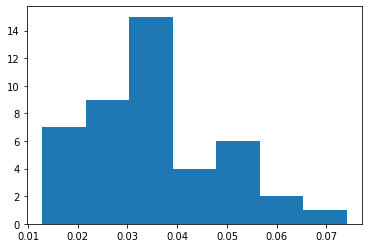

In [5]:
plt.hist(sups, bins=int(np.sqrt(50)));plt.show()

In [6]:
print("Mean of Supremum-Differences: {:.4f} | Std of Supremum-Differences: {:.4f}".format(np.mean(sups), np.std(sups)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(sups), np.min(sups)))

Mean of Supremum-Differences: 0.0351 | Std of Supremum-Differences: 0.0138
Maximum: 0.0740 | Minimum: 0.0129


### Wasserstein

In [4]:
ws = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    wsd = wasserstein_distance(
        np.array(data[variant]["Samples"]["generator"]).ravel(),
        np.array(data[variant]["Samples"]["data"]).ravel()
    )
    ws.append(wsd)
    print("Version {}: Wasserstein(U,X) = {:.4f}".format(variant, wsd))

Version 1: Wasserstein(U,X) = 0.0439
Version 2: Wasserstein(U,X) = 0.0315
Version 3: Wasserstein(U,X) = 0.0534
Version 4: Wasserstein(U,X) = 0.0512
Version 5: Wasserstein(U,X) = 0.0525
Version 6: Wasserstein(U,X) = 0.0511


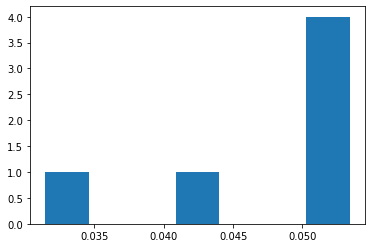

In [5]:
plt.hist(ws, bins=int(np.sqrt(50)));plt.show()

In [6]:
print("Mean of Wasserstein-Differences: {:.4f} | Std of Wasserstein-Differences: {:.4f}".format(np.mean(ws), np.std(ws)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ws), np.min(ws)))

Mean of Wasserstein-Differences: 0.0473 | Std of Wasserstein-Differences: 0.0077
Maximum: 0.0534 | Minimum: 0.0315


### KS-Stat

In [7]:
ks = []
for variant in sorted(list(data), key=lambda x: int(x.replace("Version ",""))):
    kss, _ = ks_2samp(
        np.array(data[variant]["Samples"]["generator"]).ravel(),
        np.array(data[variant]["Samples"]["data"]).ravel()
    )
    ks.append(kss)
    print("Version {}: sup |P(X)-P(U)| = {:.4f}".format(variant, kss))

Version 1: sup |P(X)-P(U)| = 0.0155
Version 2: sup |P(X)-P(U)| = 0.0126
Version 3: sup |P(X)-P(U)| = 0.0158
Version 4: sup |P(X)-P(U)| = 0.0137
Version 5: sup |P(X)-P(U)| = 0.0218
Version 6: sup |P(X)-P(U)| = 0.0150


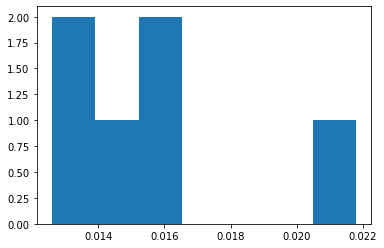

In [8]:
plt.hist(ks, bins=int(np.sqrt(50)));plt.show()

In [9]:
print("Mean of KSS: {:.4f} | Std of KSS: {:.4f}".format(np.mean(ks), np.std(ks)))
print("Maximum: {:.4f} | Minimum: {:.4f}".format(np.max(ks), np.min(ks)))

Mean of KSS: 0.0157 | Std of KSS: 0.0029
Maximum: 0.0218 | Minimum: 0.0126
